# Jabong Product Price Tracking Tool made using Robobrowser Library built on top of Requests and Beautifulsoup packages.

In [1]:
import lxml.html as html
import requests
import time
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from robobrowser import RoboBrowser
from requests import Session
session = Session()
session.verify = False

In [2]:
url = input("Enter the url : ")
br = RoboBrowser(parser = 'lxml')

Enter the url : https://www.jabong.com/us-polo-assn-navy-blue-textured-slim-fit-polo-t-shirt-5768294.htm


In [3]:
import re
br.open(url)

brand = str(br.select('span.brand')[0])
pat = r'.*>(.*)<.*'
res = re.match(pat, brand)
brand = res.group(1)

product = str(br.select('span.product-title')[0])
res = re.match(pat, product)
product = res.group(1)

mrp = str(br.select('span.standard-price')[1])
res = re.match(pat, mrp)
mrp = int(res.group(1))

sp = str(br.select('span.actual-price')[0])
res = re.match(pat, sp)
sp = int(res.group(1))

wallet = str(br.select('span.wallet-title')[0])
res = re.match(pat, wallet)
wallet = res.group(1)

offer = str(br.select('span.wallet-desc')[0])
res = re.match(pat, offer)
offer = res.group(1)

print('Product Brand : %s'%(brand))
print('Product Description : %s'%(product))
print('MRP of the product : %d'%(mrp))
print('Current Selling Price : %d'%(sp))
print('Additional Offer %s %s'%(wallet,offer))

Product Brand : U.S. Polo Assn.
Product Description : Navy Blue Textured Slim Fit Polo T-Shirt
MRP of the product : 2399
Current Selling Price : 839
Additional Offer YES Bank:  Get 15% Instant discount on Min Spend of Rs.2500


-------------------------Tracking Started-------------------------
Current Price : 839  YES Bank:  Get 15% Instant discount on Min Spend of Rs.2500
Current Price : 839  YES Bank:  Get 15% Instant discount on Min Spend of Rs.2500
Current Price : 839  YES Bank:  Get 15% Instant discount on Min Spend of Rs.2500
Current Price : 839  YES Bank:  Get 15% Instant discount on Min Spend of Rs.2500
Current Price : 839  YES Bank:  Get 15% Instant discount on Min Spend of Rs.2500
Current Price : 839  YES Bank:  Get 15% Instant discount on Min Spend of Rs.2500
Current Price : 839  YES Bank:  Get 15% Instant discount on Min Spend of Rs.2500
Current Price : 839  YES Bank:  Get 15% Instant discount on Min Spend of Rs.2500
Current Price : 839  YES Bank:  Get 15% Instant discount on Min Spend of Rs.2500


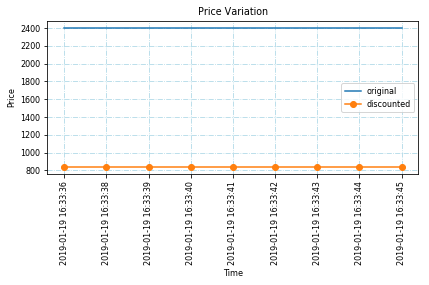

<Figure size 1440x1440 with 0 Axes>

In [5]:
print('-------------------------Tracking Started-------------------------')

xaxis = []
actual_price = []
selling_price = []

matplotlib.rc('font', size=8)
matplotlib.rc('font', family='sans-serif')
c=1
while(c<10):
    br.open(url)
    
    mrp = str(br.select('span.standard-price')[1])
    res = re.match(pat, mrp)
    mrp = int(res.group(1))

    sp = str(br.select('span.actual-price')[0])
    res = re.match(pat, sp)
    sp = int(res.group(1))
    
    wallet = str(br.select('span.wallet-title')[0])
    res = re.match(pat, wallet)
    wallet = res.group(1)

    offer = str(br.select('span.wallet-desc')[0])
    res = re.match(pat, offer)
    offer = res.group(1)
    
    actual_price.append(mrp)
    selling_price.append(sp)
    
    t = time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())
    xaxis.append(t)
    print('Current Price : %d  %s %s'%(sp, wallet, offer))
    time.sleep(1)
    c+=1

x_pos = np.arange(len(xaxis))
plt.title('Price Variation')
plt.xlabel('Time')
plt.ylabel('Price')
plt.xticks(x_pos, xaxis, rotation=90)
plt.plot(xaxis, actual_price , label='original')
plt.plot(xaxis, selling_price , label='discounted', marker='o')
plt.legend()
plt.grid(color='lightblue', linestyle='-.')
plt.tight_layout()
plt.figure(figsize=(20,20))
plt.savefig('output.png', dpi=600)